**Title for the project:**
# Customer Data Analysis and Predictive Modeling to Optimize Term Deposit Subscriptions in a Portuguese Banking Institution

In [284]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [285]:
df=pd.read_csv(r"C:\Users\mdsk5\Downloads\DsResearch\DsResearch\Banking\banking_data.csv")
df

,age,job,marital,marital_status,education,default,balance,housing,loan,contact,day,month,day_month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,married,tertiary,no,2143,yes,no,unknown,5,may,5-May,261,1,-1,0,unknown,no
1,44,technician,single,single,secondary,no,29,yes,no,unknown,5,may,5-May,151,1,-1,0,unknown,no
2,33,entrepreneur,married,married,secondary,no,2,yes,yes,unknown,5,may,5-May,76,1,-1,0,unknown,no
3,47,blue-collar,married,married,unknown,no,1506,yes,no,unknown,5,may,5-May,92,1,-1,0,unknown,no
4,33,unknown,single,single,unknown,no,1,no,no,unknown,5,may,5-May,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45211,29,management,single,single,tertiary,no,765,no,no,cellular,16,nov,16-Nov,238,1,-1,0,unknown,yes
45212,68,retired,married,married,secondary,no,1146,no,no,cellular,16,nov,16-Nov,212,1,187,6,success,yes
45213,53,management,married,married,tertiary,no,583,no,no,cellular,17,nov,17-Nov,226,1,184,4,success,yes
45214,73,retired,married,married,secondary,no,2850,no,no,cellular,17,nov,17-Nov,300,1,40,8,failure,yes


# What is the distribution of age among the clients?

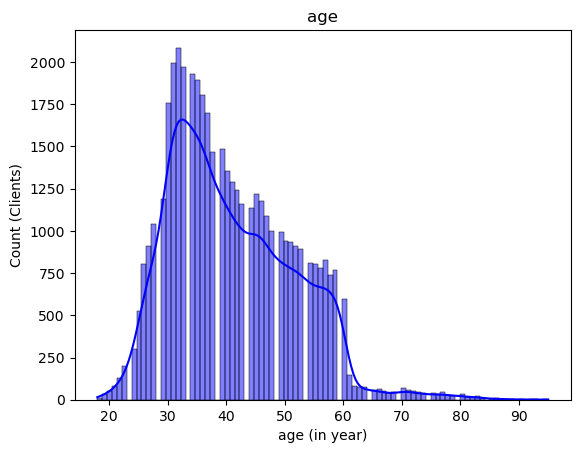

count    45216.000000
mean        40.938186
std         10.621249
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64
90% clients are less than 56.0 years old.


In [286]:
sns.histplot(data=df,x="age",kde=True,color="b")
plt.xlabel("age (in year)")
plt.ylabel("Count (Clients)")
plt.title("age")
plt.savefig(f"age.png",bbox_inches='tight')
plt.show()
print(f"{df['age'].describe()}")
print(f'90% clients are less than {df.age.quantile(.9)} years old.')

# How does the job type vary among the clients? 

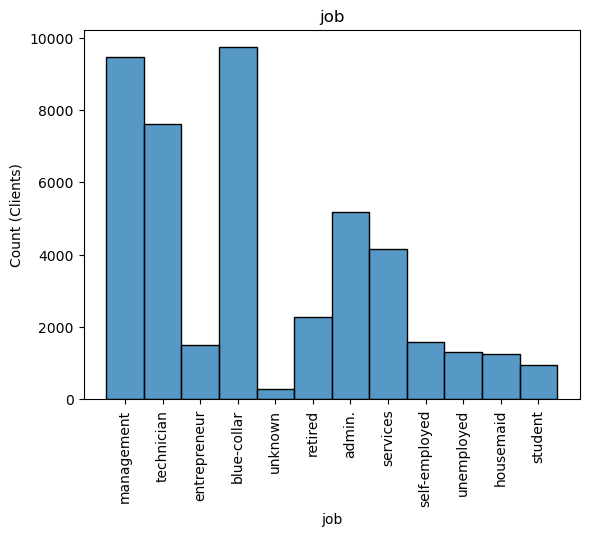

In [287]:
sns.histplot(data=df,x="job")
plt.xticks(rotation="vertical")
plt.ylabel("Count (Clients)")
plt.title("job")
plt.savefig(f"job.png",bbox_inches='tight')

# What is the marital status distribution of the clients?

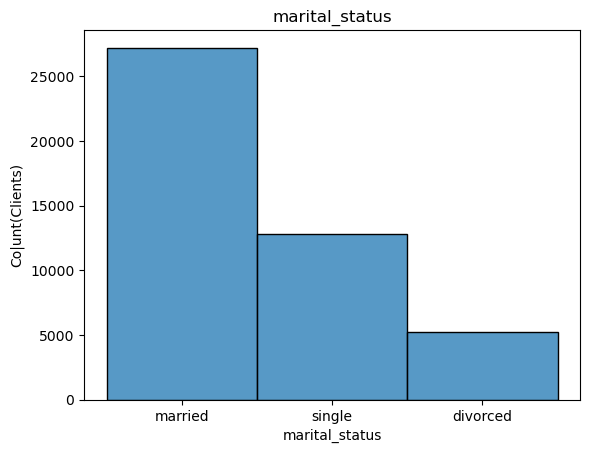

,count
marital_status,
married,27216
single,12790
divorced,5207


In [288]:
sns.histplot(data=df,x="marital_status")
plt.ylabel("Co|unt(Clients)")
plt.title("marital_status")
plt.savefig(f"marital.png",bbox_inches='tight')
plt.show()
ms=df["marital_status"].value_counts()
pd.DataFrame(ms)

More than half of the clients are married.

# What is the level of education among the clients?

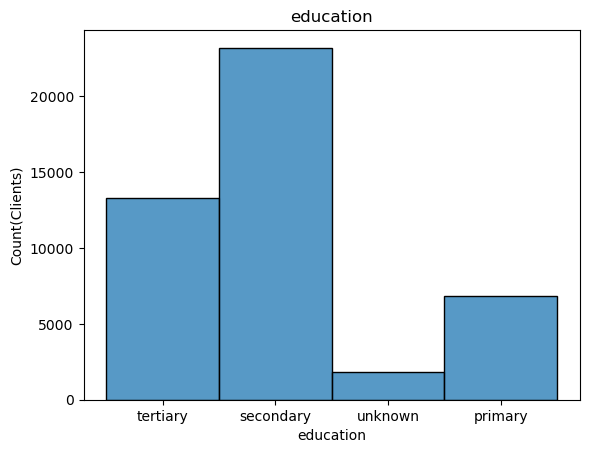

,count
education,
secondary,23204
tertiary,13301
primary,6851
unknown,1857


In [289]:
sns.histplot(data=df,x="education")
plt.ylabel("Count(Clients)")
plt.title("education")
plt.savefig(f"education.png",bbox_inches='tight')
plt.show()

ed=df["education"].value_counts()
pd.DataFrame(ed)

More than half of the clients are secondary qualified

# What proportion of clients have credit in default?

In [290]:
de=df["default"].value_counts()
pde=pd.DataFrame(de)
pde

,count
default,
no,44401
yes,815


In [291]:
no_yes=pde.loc["yes"][0]   # No of clients have default.
total=pde.loc["yes"][0]+pde.loc["no"][0]
fraction=(no_yes/total)*100
print(f"The percentage of clients have credit in default is {round(fraction, 2)} %")

The percentage of clients have credit in default is 1.8 %


# What is the distribution of average yearly balance among the clients?

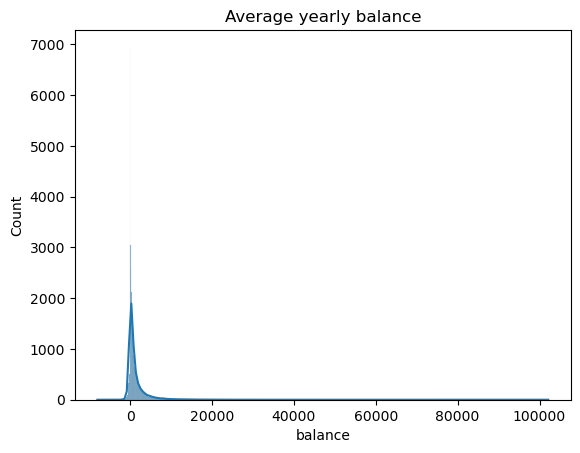

90% of clients have balance less than 3574.0


,balance
count,45216.000000
mean,1362.277844
std,3044.609674
min,-8019.000000
25%,72.000000
50%,448.500000
75%,1428.000000
max,102127.000000


In [292]:
sns.histplot(data=df,x="balance",kde=True)
plt.title("Average yearly balance")
plt.savefig(f"balance.png",bbox_inches='tight')
plt.show()
print(f'90% of clients have balance less than {df.balance.quantile(.9)}')
pd.DataFrame(df["balance"].describe())

# How many clients have housing loans?

In [293]:
hl_yes=df.housing[df["housing"]=="yes"].count()
print(f"{hl_yes} clients have housing loans.")

25130 clients have housing loans.


# How many clients have personal loans?

In [294]:
pl_yes=df.loan[df["loan"]=="yes"].count()
print(f"{pl_yes} clients have personal loans.")

7244 clients have personal loans.


# What are the communication types used for contacting clients during the campaign?

In [295]:
con_type=set(df["contact"].values)
print(f"The communication types used for contacting clients during the campaign are: {','.join(con_type)}")

The communication types used for contacting clients during the campaign are: telephone,unknown,cellular


# What is the distribution of the last contact day of the month?

In [296]:
len(set(df["day"]))

31

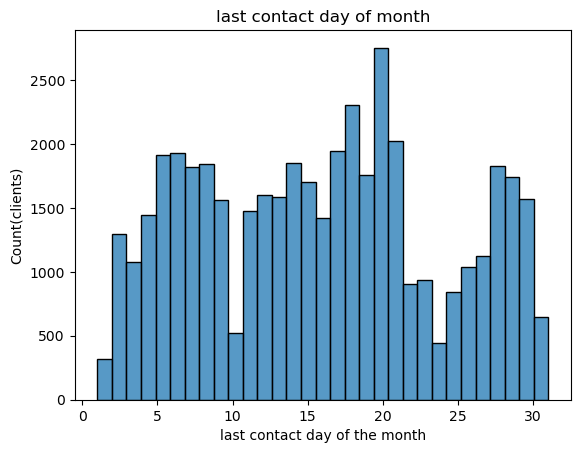

In [297]:
sns.histplot(data=df,x=df["day"],bins=31)
plt.xlabel("last contact day of the month")
plt.ylabel("Count(clients)")
plt.title("last contact day of month")
plt.savefig(f"day.png",bbox_inches='tight')
plt.show()


# How does the last contact month vary among the clients?

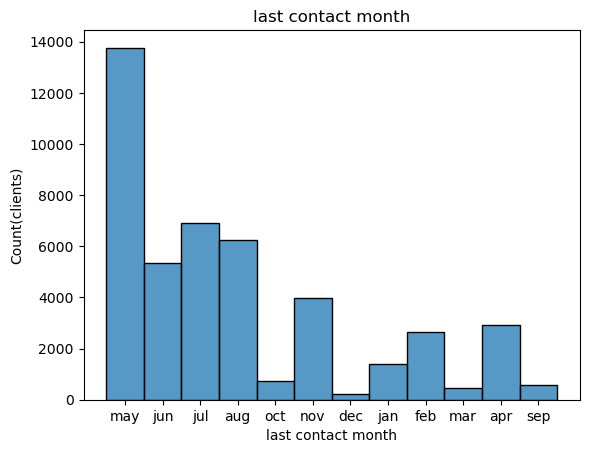

In [298]:
months=["jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"]

sns.histplot(data=df,x=df["month"],bins=months)
plt.xlabel("last contact month")
plt.ylabel("Count(clients)")
plt.title("last contact month")
plt.savefig(f"month.png",bbox_inches='tight')
plt.show()

In may, most of the contacts were happened.

# What is the distribution of the duration of the last contact?

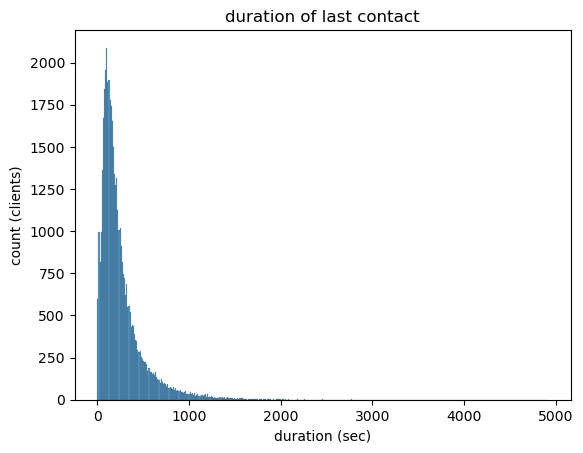

90% of the last contact duration was less than 547.5 sec


,duration
count,45216.000000
mean,258.166202
std,257.515482
min,0.000000
25%,103.000000
50%,180.000000
75%,319.000000
max,4918.000000


In [299]:
sns.histplot(data=df,x="duration")
plt.xlabel("duration (sec)")
plt.ylabel("count (clients)")
plt.title("duration of last contact")
plt.savefig(f"duration.png",bbox_inches='tight')
plt.show()
print(f'90% of the last contact duration was less than {df.duration.quantile(.9)} sec')
pd.DataFrame(df["duration"].describe())

# What is the distribution of the number of days passed since the client was last contacted from a previous campaign?

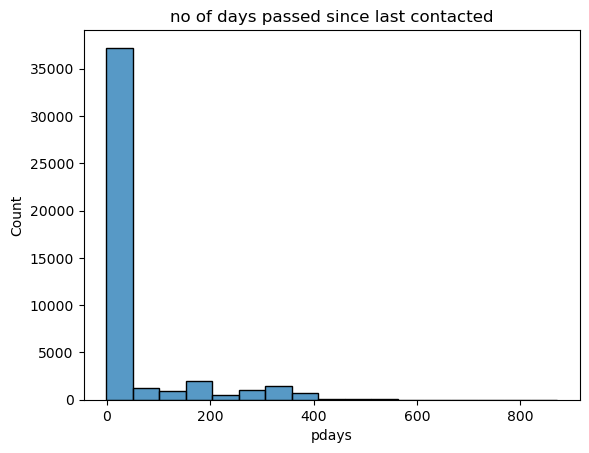

,pdays
count,45216.000000
mean,40.202428
std,100.128248
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,871.000000


In [300]:
sns.histplot(data=df,x="pdays")
plt.title("no of days passed since last contacted")
plt.savefig(f"pdays.png",bbox_inches='tight')
plt.show()
pd.DataFrame(df["pdays"].describe())

In [301]:
l=len(df["pdays"][df["pdays"]==-1])
print(f'{l} no of clients were not contacted before.')

36956 no of clients were not contacted before.


# How many contacts were performed before the current campaign for each client?

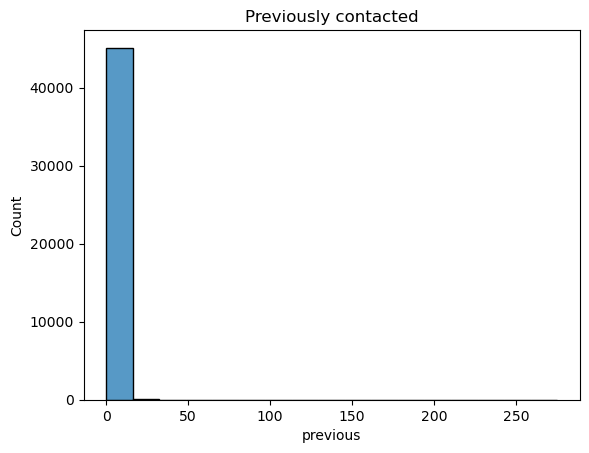

,previous
count,45216.000000
mean,0.580657
std,2.303778
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,275.000000


In [302]:
sns.histplot(data=df,x="previous")
plt.title("Previously contacted")
plt.savefig(f"previous.png",bbox_inches='tight')
plt.show()
pd.DataFrame(df["previous"].describe())

In [345]:
c_0=len(df["previous"][df["previous"]==0])
t_cl=len(df['previous'])
print(f"Among {t_cl} clients, {c_0} no of clients were not contacted previously.")

Among 45216 clients, 36956 no of clients were not contacted previously.


In [346]:
tc=df["previous"].sum(skipna=True)
print(f"For {t_cl-c_0} clients, total no of {tc} contact were done before this campaign.")

For 8260 clients, total no of 26255 contact were done before this campaign.


# What were the outcomes of the previous marketing campaigns?

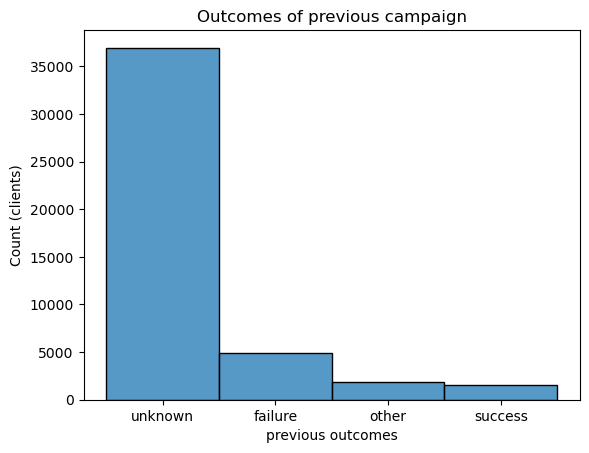

,count
poutcome,
unknown,36961
failure,4902
other,1840
success,1513


In [305]:
sns.histplot(data=df,x="poutcome")
plt.xlabel("previous outcomes")
plt.ylabel("Count (clients)")
plt.title("Outcomes of previous campaign")
plt.savefig(f"poutcome.png",bbox_inches='tight')
plt.show()
poutcome=pd.DataFrame(df["poutcome"].value_counts())
poutcome

# What is the distribution of clients who subscribed to a term deposit vs. those who did not?

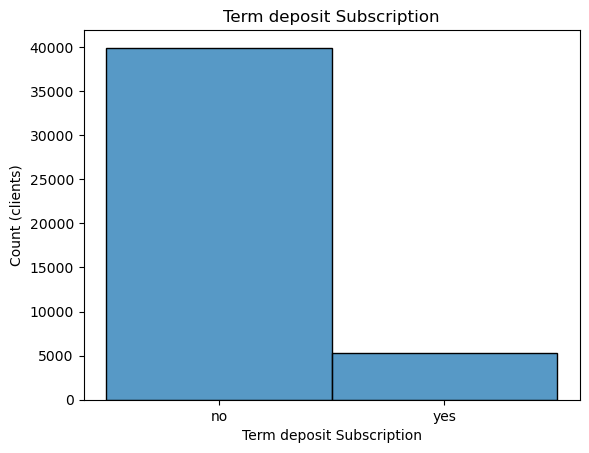

     count
y         
no   39922
yes   5294

11.71% clients subscribed a term deposit


In [306]:
sns.histplot(data=df, x="y")
plt.xlabel("Term deposit Subscription")
plt.ylabel("Count (clients)")
plt.title("Term deposit Subscription")
plt.savefig(f"y.png",bbox_inches='tight')
plt.show()
y=pd.DataFrame(df["y"].value_counts())
print(y)
per=(y.loc["yes"][0]/len(df))*100
print(f'\n{per :.2f}% clients subscribed a term deposit')

# Are there any correlations between different attributes and the likelihood of subscribing to a term deposit?

There are two types of features. One is Numerical and other is Categorical. So the correlations are shown in two parts

In [307]:
df["term_subscription"]=df["y"].map({
    "yes":1,
    "no":0
})


In [308]:
df

,age,job,marital,marital_status,education,default,balance,housing,loan,contact,day,month,day_month,duration,campaign,pdays,previous,poutcome,y,term_subscription
0,58,management,married,married,tertiary,no,2143,yes,no,unknown,5,may,5-May,261,1,-1,0,unknown,no,0
1,44,technician,single,single,secondary,no,29,yes,no,unknown,5,may,5-May,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,married,secondary,no,2,yes,yes,unknown,5,may,5-May,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,married,unknown,no,1506,yes,no,unknown,5,may,5-May,92,1,-1,0,unknown,no,0
4,33,unknown,single,single,unknown,no,1,no,no,unknown,5,may,5-May,198,1,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45211,29,management,single,single,tertiary,no,765,no,no,cellular,16,nov,16-Nov,238,1,-1,0,unknown,yes,1
45212,68,retired,married,married,secondary,no,1146,no,no,cellular,16,nov,16-Nov,212,1,187,6,success,yes,1
45213,53,management,married,married,tertiary,no,583,no,no,cellular,17,nov,17-Nov,226,1,184,4,success,yes,1
45214,73,retired,married,married,secondary,no,2850,no,no,cellular,17,nov,17-Nov,300,1,40,8,failure,yes,1


In [309]:
df.drop(["marital","day_month"],axis=1,inplace=True)

In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45216 entries, 0 to 45215
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                45216 non-null  int64 
 1   job                45216 non-null  object
 2   marital_status     45213 non-null  object
 3   education          45213 non-null  object
 4   default            45216 non-null  object
 5   balance            45216 non-null  int64 
 6   housing            45216 non-null  object
 7   loan               45216 non-null  object
 8   contact            45216 non-null  object
 9   day                45216 non-null  int64 
 10  month              45216 non-null  object
 11  duration           45216 non-null  int64 
 12  campaign           45216 non-null  int64 
 13  pdays              45216 non-null  int64 
 14  previous           45216 non-null  int64 
 15  poutcome           45216 non-null  object
 16  y                  45216 non-null  objec

In [311]:
df.nunique()

age                    77
job                    12
marital_status          3
education               4
default                 2
balance              7168
housing                 2
loan                    2
contact                 3
day                    31
month                  12
duration             1573
campaign               48
pdays                 559
previous               41
poutcome                4
y                       2
term_subscription       2
dtype: int64

In [312]:
imbalance=df[["term_subscription"]].value_counts().to_frame()
imbalance

,count
term_subscription,
0,39922
1,5294


So, There is data imbalance

In [313]:
categorical_features=df.select_dtypes(include='object').columns.tolist()
categorical_features.remove("y")
categorical_features

['job',
 'marital_status',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [314]:
target=df["term_subscription"]

# Numerical features vs Target

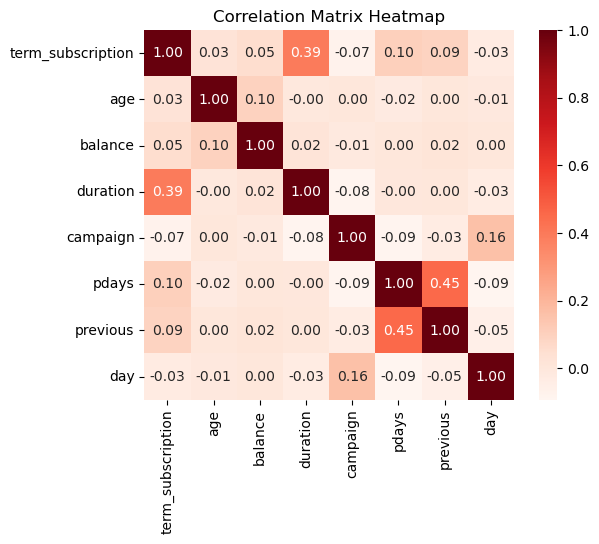

In [343]:
numerical_features=df[["age","balance","duration","campaign","pdays","previous","day"]]
correlation=pd.concat([target,numerical_features],axis=1).corr()
sns.heatmap(correlation, annot=True, cmap='Reds', fmt='.2f', square=True)
plt.title('Correlation Matrix Heatmap')
plt.savefig(f"correlation_matrix.png",bbox_inches='tight')
plt.show()

In [316]:
numerical=df.select_dtypes(exclude="object").columns.tolist()
numerical.remove("term_subscription")
numerical

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

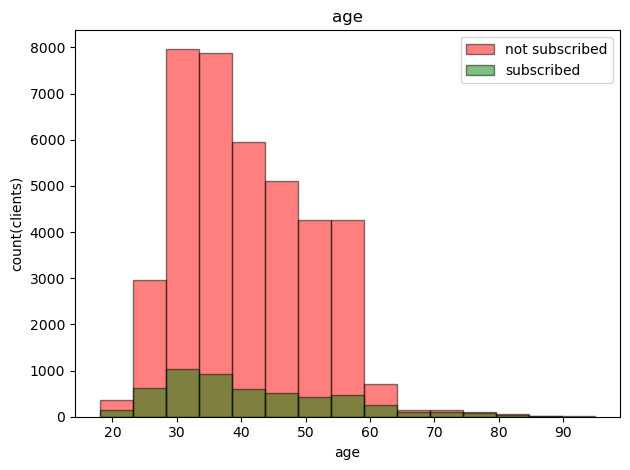

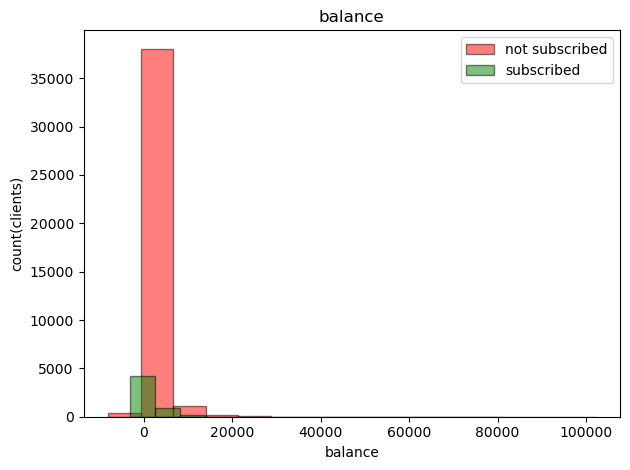

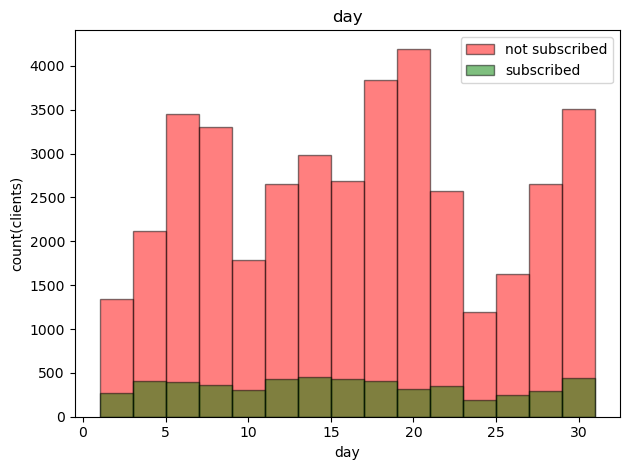

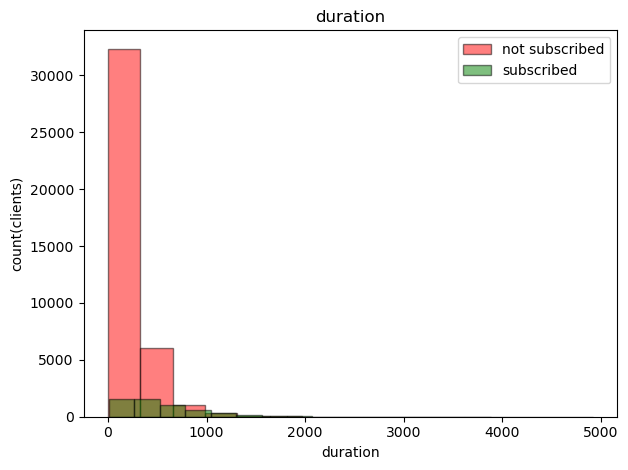

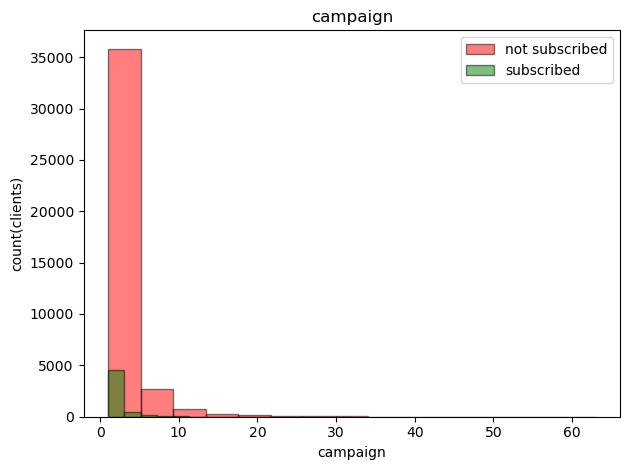

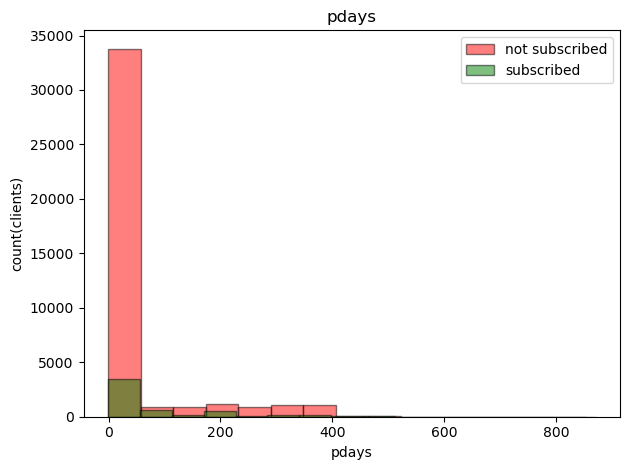

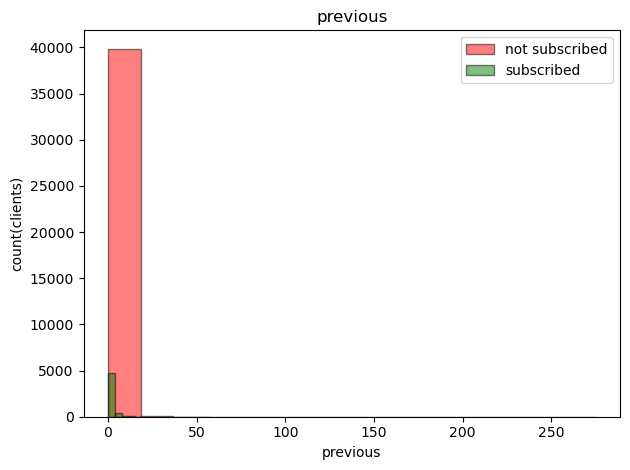

In [317]:

# Plot each numerical feature against the target
for feature in numerical:
    plt.hist(df[df["term_subscription"] ==0][feature], bins = 15, label ='not subscribed', alpha = .50,edgecolor= 'black',color ='red')
    plt.hist(df[df["term_subscription"]==1][feature], bins = 15, label = 'subscribed', alpha = .50, edgecolor = 'black',color = 'green')
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('count(clients)')
    plt.legend(loc = 'upper right')
    plt.savefig(f"num_{feature}.png",bbox_inches='tight')
    plt.tight_layout()
    plt.show()

In [344]:
df.campaign.describe()

count    45216.000000
mean         2.763668
std          3.097896
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

# Categorical features vs Target

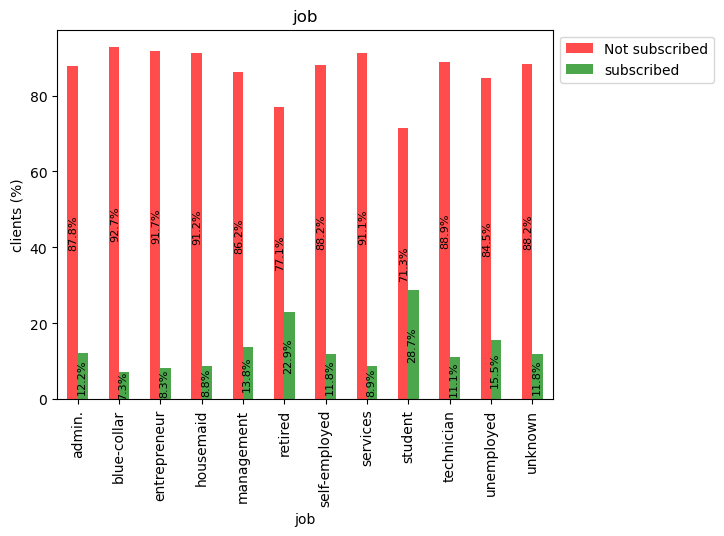

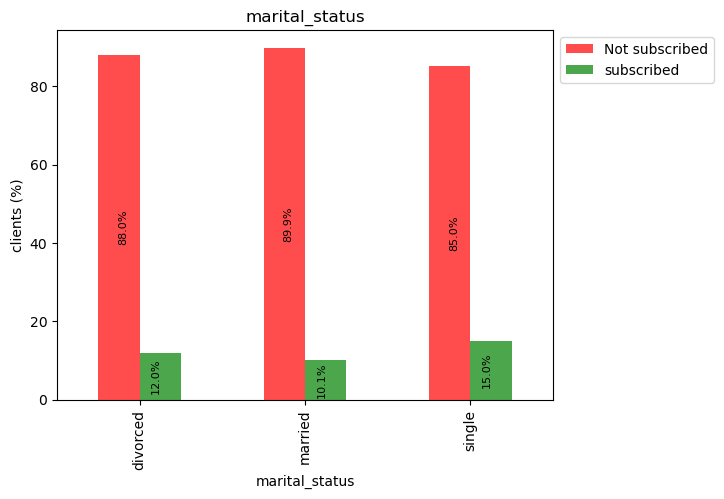

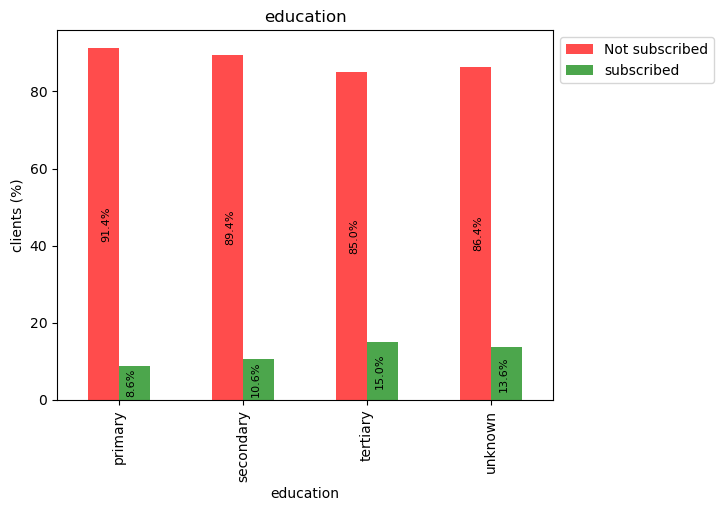

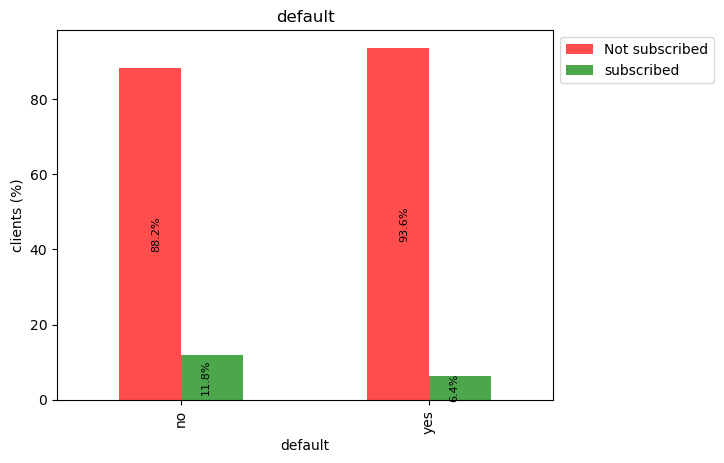

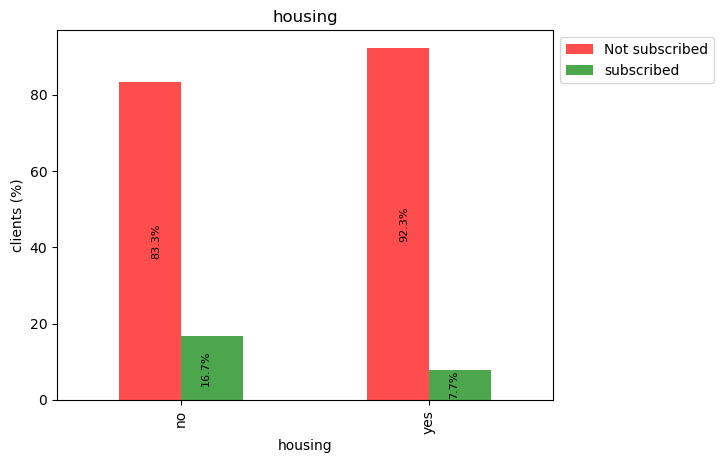

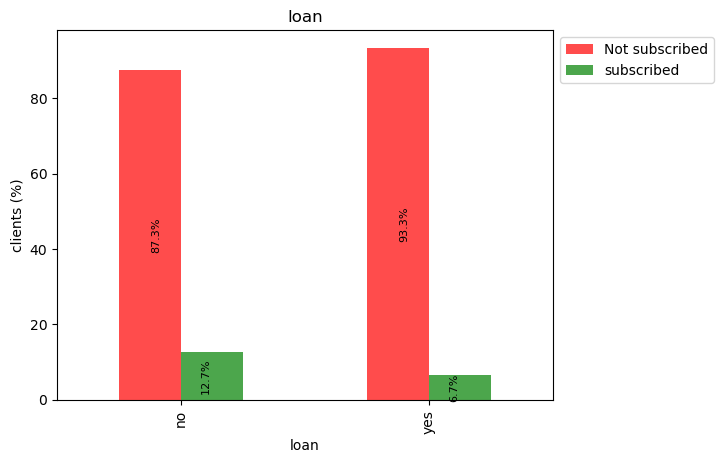

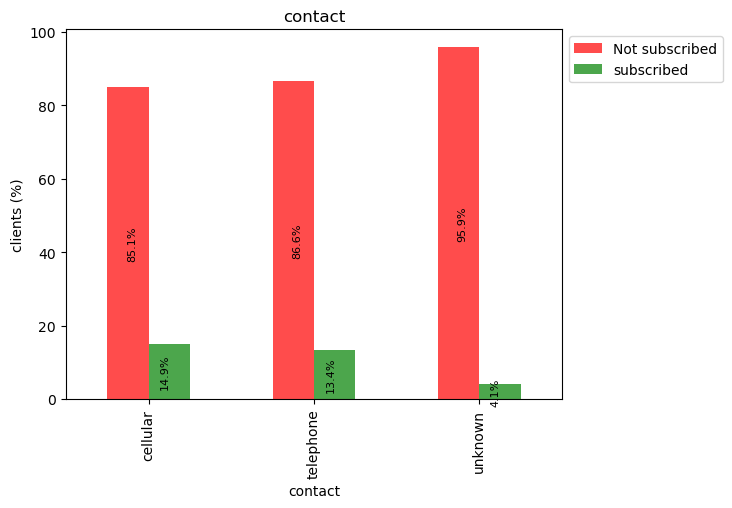

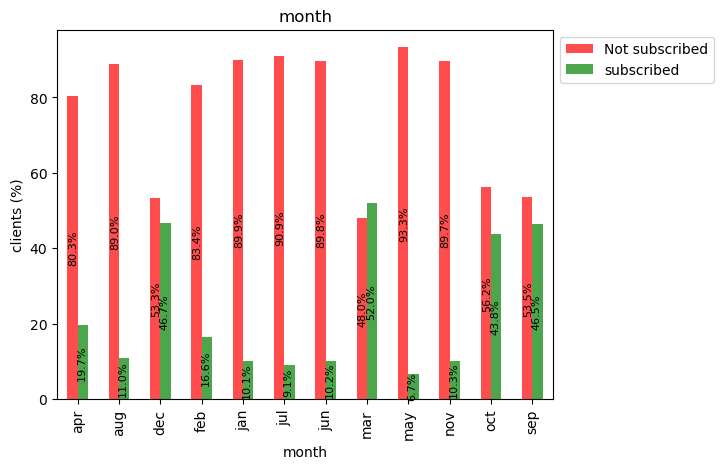

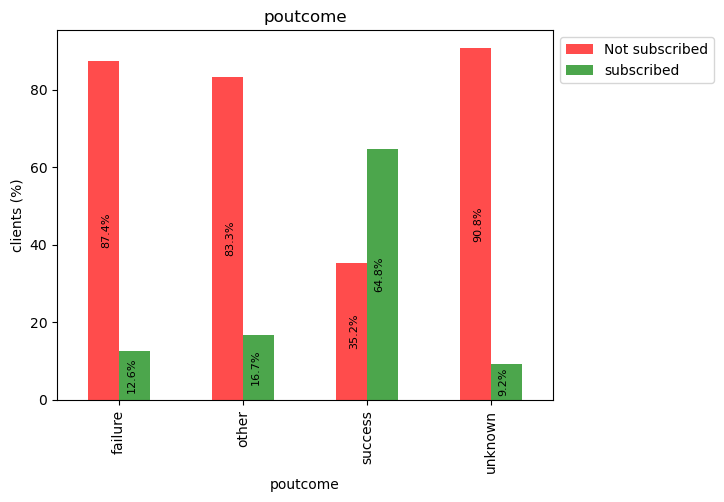

In [318]:

# Plot each categorical feature against the target

for j in categorical_features:
    hous= df.groupby([j,'term_subscription'])[j].count().unstack()  # making group those who subscribed or not
    percentages = hous.div(hous.sum(axis=1), axis=0) * 100      # calculating the percentages for two different category

    p1 = percentages.plot(kind = 'bar', stacked = False, 
                       title = j, 
                       color = ['red','green'], alpha = .70)
    p1.set_xlabel(j)
    p1.set_ylabel('clients (%)')
    p1.legend(['Not subscribed','subscribed'],bbox_to_anchor=(1,1),loc=2)


    for i,index in enumerate(percentages.index):
        not_sub_percentage = percentages.loc[index, 0]
        sub_percentage = percentages.loc[index, 1]        
        p1.text(i-0.1,not_sub_percentage/2, f"{not_sub_percentage:.1f}%", fontsize=8,
                ha='center', va='center', color='black',rotation=90)   # writing the percentage as text

        p1.text(i+0.1,sub_percentage/2, 
                f"{sub_percentage:.1f}%",fontsize=8, ha='center', va='center', color='black', rotation=90)
                                                 # writing the percentage as text
    plt.savefig(f"cat_{j}.png",bbox_inches='tight')
    plt.show()

In [319]:
features=numerical_features   # features is a new data frame which we will use for machine learning training
# That's why first include the numerical features

# Vectorization

In [320]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [321]:
for i in categorical_features:
    le=LabelEncoder()
    df["labeled_"+i]=le.fit_transform(df[i])   # Vectorization of the categorical features using label encoder

In [322]:
df.head()

,age,job,marital_status,education,default,balance,housing,loan,contact,day,...,term_subscription,labeled_job,labeled_marital_status,labeled_education,labeled_default,labeled_housing,labeled_loan,labeled_contact,labeled_month,labeled_poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,4,1,2,0,1,0,2,8,3
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,9,2,1,0,1,0,2,8,3
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,2,1,1,0,1,1,2,8,3
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,1,1,3,0,1,0,2,8,3
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,11,2,3,0,0,0,2,8,3


In [323]:
df[["job","labeled_job"]].value_counts().index.to_frame(index=False)   # showing how the label encoding happens

,job,labeled_job
0,blue-collar,1
1,management,4
2,technician,9
3,admin.,0
4,services,7
5,retired,5
6,self-employed,6
7,entrepreneur,2
8,unemployed,10
9,housemaid,3


In [324]:
features=df.drop(categorical_features,axis=1)
features.drop(["y","term_subscription"],axis=1,inplace=True)
features      # features is ready for train test split

,age,balance,day,duration,campaign,pdays,previous,labeled_job,labeled_marital_status,labeled_education,labeled_default,labeled_housing,labeled_loan,labeled_contact,labeled_month,labeled_poutcome
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,2,8,3
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,2,8,3
2,33,2,5,76,1,-1,0,2,1,1,0,1,1,2,8,3
3,47,1506,5,92,1,-1,0,1,1,3,0,1,0,2,8,3
4,33,1,5,198,1,-1,0,11,2,3,0,0,0,2,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45211,29,765,16,238,1,-1,0,4,2,2,0,0,0,0,9,3
45212,68,1146,16,212,1,187,6,5,1,1,0,0,0,0,9,2
45213,53,583,17,226,1,184,4,4,1,2,0,0,0,0,9,2
45214,73,2850,17,300,1,40,8,5,1,1,0,0,0,0,9,0


In [325]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split,StratifiedKFold,HalvingGridSearchCV

In [326]:
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42,stratify=target)
# There is a data imbalance. That's why "stratify=target" is used.

In [327]:
y_train.value_counts()

term_subscription
0    31937
1     4235
Name: count, dtype: int64

In [328]:
# scaling the features
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

In [329]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,jaccard_score,f1_score,confusion_matrix,ConfusionMatrixDisplay

# Hyperparameter Tuning

HalvingGridSearchCV is used to run it fast

In [330]:
#hyperparameter tuning for logistic regression model

parameters={
    'C': [0.1, 1, 10, 100]   # Inverse of regularization strength
}
gs_cv_log=HalvingGridSearchCV(LogisticRegression(max_iter=1000),param_grid=parameters,cv=StratifiedKFold(n_splits=5), scoring='accuracy',n_jobs=-1)
gs_cv_log.fit(X_train_sc,y_train)
print(f"Best parameters for logistic regression are: {gs_cv_log.best_params_}")
print(f"Best score for logistic regression is: {gs_cv_log.best_score_ :.2f}")

Best parameters for logistic regression are: {'C': 10}
Best score for logistic regression is: 0.89


In [331]:
#hyperparameter tuning for Random forest model

parameters={
    'n_estimators': [100, 200, 300, 500],      # Number of trees in the forest
    'max_depth': [None, 10, 20, 30]
}
gs_cv_ran=HalvingGridSearchCV(RandomForestClassifier(random_state=42),param_grid=parameters,cv=StratifiedKFold(n_splits=5), scoring='accuracy',n_jobs=-1)
gs_cv_ran.fit(X_train_sc,y_train)
print(f"Best parameters for Random Forest model are: {gs_cv_ran.best_params_}")
print(f"Best score for Random Forest model is: {gs_cv_ran.best_score_ :.2f}")

Best parameters for Random Forest model are: {'max_depth': 10, 'n_estimators': 200}
Best score for Random Forest model is: 0.90


In [332]:
#hyperparameter tuning for Decision Tree classifier

parameters={
    'criterion': ['gini', 'entropy'],   # Split criterion
    'max_depth': [None, 5, 10, 15, 20]
}
gs_cv_dt=HalvingGridSearchCV(DecisionTreeClassifier(random_state=42),param_grid=parameters,cv=StratifiedKFold(n_splits=5), scoring='accuracy',n_jobs=-1)
gs_cv_dt.fit(X_train_sc,y_train)
print(f"Best parameters for Decision Tree classifier are: {gs_cv_dt.best_params_}")
print(f"Best score for Decision Tree classifier is: {gs_cv_dt.best_score_ :.2f}")

Best parameters for Decision Tree classifier are: {'criterion': 'gini', 'max_depth': 5}
Best score for Decision Tree classifier is: 0.90


In [333]:
#hyperparameter tuning for Gradient boosting

parameters={
    'n_estimators': [100,200,300,500], # Number of boosting stages (trees)
    'max_depth': [3, 5, 7, 9]
}
gs_cv_gb=HalvingGridSearchCV(GradientBoostingClassifier(random_state=42),param_grid=parameters,cv=StratifiedKFold(n_splits=5), scoring='accuracy',n_jobs=-1)
gs_cv_gb.fit(X_train_sc,y_train)
print(f"Best parameters for Gradient boosting are: {gs_cv_gb.best_params_}")
print(f"Best score for Gradient boosting is: {gs_cv_gb.best_score_ :.2f}")

Best parameters for Gradient boosting are: {'max_depth': 7, 'n_estimators': 200}
Best score for Gradient boosting is: 0.91


In [334]:
#hyperparameter tuning for svm

parameters={
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly']
}
gs_cv_svm=HalvingGridSearchCV(SVC(),param_grid=parameters,cv=StratifiedKFold(n_splits=5), scoring='accuracy',n_jobs=-1)
gs_cv_svm.fit(X_train_sc,y_train)
print(f"Best parameters for svm are: {gs_cv_svm.best_params_}")
print(f"Best score for svm is: {gs_cv_svm.best_score_ :.2f}")


Best parameters for svm are: {'C': 10, 'kernel': 'rbf'}
Best score for svm is: 0.90


# Model Evaluation

In [335]:
# creating function for model evaluation
def model_evaluation(gs_cv,model):
    best_model=gs_cv.best_estimator_                      #choosing the best model from hyperparameter tuning
    y_pred = best_model.predict(X_test_sc)             #predicting on test dataset
    acc_score=accuracy_score(y_test, y_pred)
    jac_index=jaccard_score(y_test, y_pred)
    f1_sc=f1_score(y_test, y_pred)
    print(f"Classification Report for {model}:\n{classification_report(y_test, y_pred)}")                    #showing classification report
    cm = confusion_matrix(y_test, y_pred)

    # Display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"Confusion matrix for {model}")
    plt.xticks(ticks=[0,1],labels=["Not subscribed","subscribed"])
    plt.yticks(ticks=[0,1],labels=["Not subscribed","subscribed"])
    plt.savefig(f"cm_{model}.png",bbox_inches='tight')
    return f"{acc_score :.2f}",f"{jac_index :.2f}",f"{f1_sc :.2f}"

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7985
           1       0.58      0.21      0.31      1059

    accuracy                           0.89      9044
   macro avg       0.74      0.60      0.63      9044
weighted avg       0.87      0.89      0.87      9044



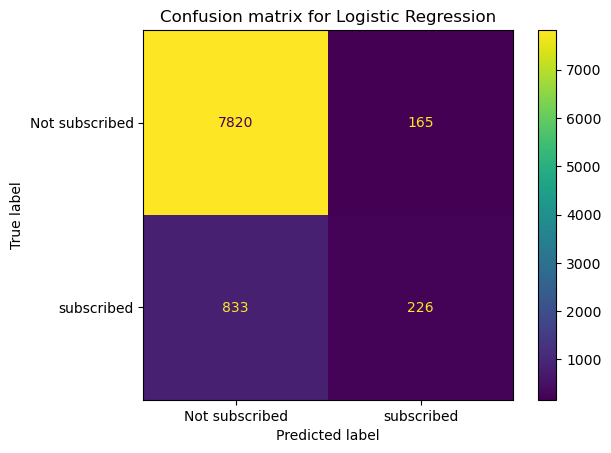

In [336]:
# model evaluation for logistic regression
acc_sc_log,jac_index_log,f1_sc_log=model_evaluation(gs_cv_log,"Logistic Regression")

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7985
           1       0.67      0.34      0.45      1059

    accuracy                           0.90      9044
   macro avg       0.79      0.66      0.70      9044
weighted avg       0.89      0.90      0.89      9044



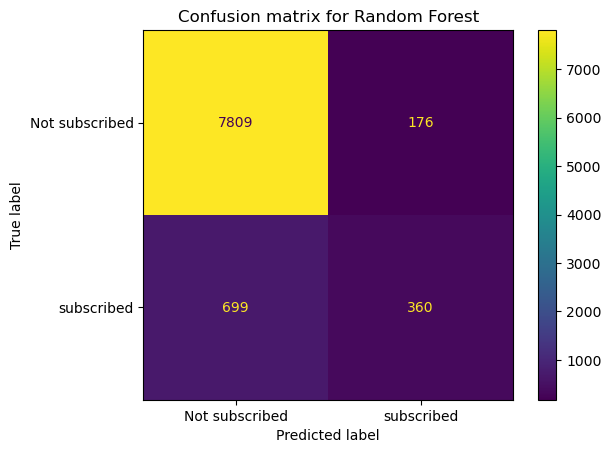

In [337]:
# model evaluation for Random forest
acc_sc_ran,jac_index_ran,f1_sc_ran=model_evaluation(gs_cv_ran,"Random Forest")

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7985
           1       0.58      0.39      0.47      1059

    accuracy                           0.90      9044
   macro avg       0.75      0.68      0.70      9044
weighted avg       0.88      0.90      0.89      9044



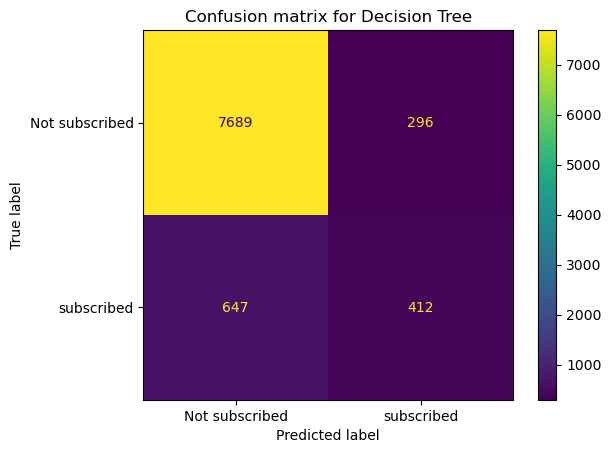

In [338]:
# model evaluation for decision tree
acc_sc_dt,jac_index_dt,f1_sc_dt=model_evaluation(gs_cv_dt,"Decision Tree")

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7985
           1       0.62      0.48      0.54      1059

    accuracy                           0.90      9044
   macro avg       0.78      0.72      0.74      9044
weighted avg       0.90      0.90      0.90      9044



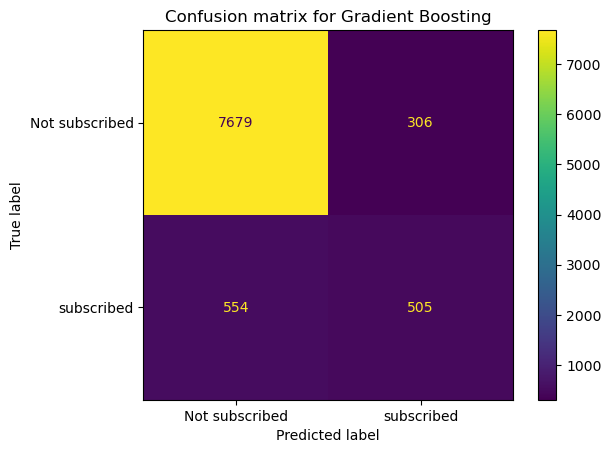

In [339]:
# model evaluation for gradient boosting
acc_sc_gb,jac_index_gb,f1_sc_gb=model_evaluation(gs_cv_gb,"Gradient Boosting")

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7985
           1       0.62      0.32      0.42      1059

    accuracy                           0.90      9044
   macro avg       0.77      0.65      0.68      9044
weighted avg       0.88      0.90      0.88      9044



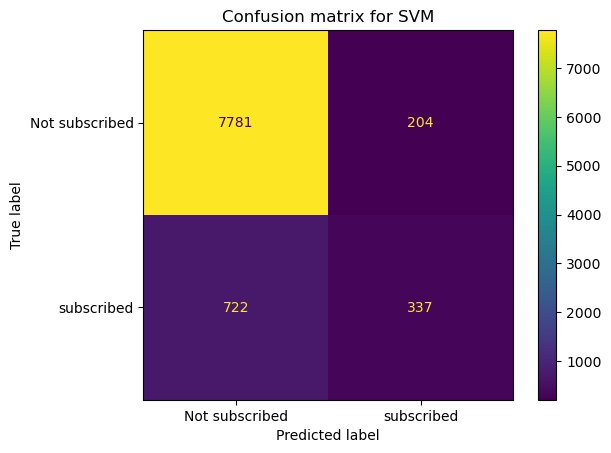

In [340]:
# model evaluation for svm
acc_sc_svm,jac_index_svm,f1_sc_svm=model_evaluation(gs_cv_svm,"SVM")

In [341]:
Report=pd.DataFrame({
    "models":["logistic regression","Random forest","Decision Tree","Gradient boosting","SVM"],
    "Accuracy score":[acc_sc_log,acc_sc_ran,acc_sc_dt,acc_sc_gb,acc_sc_svm],
    "Jaccard Index":[jac_index_log,jac_index_ran,jac_index_dt,jac_index_gb,jac_index_svm],
    "f1-score":[f1_sc_log,f1_sc_ran,f1_sc_dt,f1_sc_gb,f1_sc_svm]
})
Report

,models,Accuracy score,Jaccard Index,f1-score
0,logistic regression,0.89,0.18,0.31
1,Random forest,0.90,0.29,0.45
2,Decision Tree,0.90,0.30,0.47
3,Gradient boosting,0.90,0.37,0.54
4,SVM,0.90,0.27,0.42


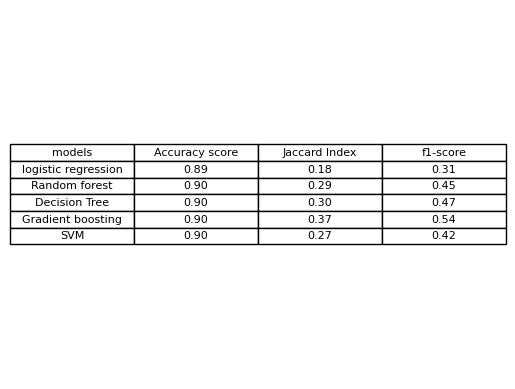

In [342]:
# ploting the Report as a table
plt.axis('tight')
plt.axis('off')
table = plt.table(cellText=Report.values, colLabels=Report.columns, cellLoc = 'center', loc='center')
plt.savefig('Evaluation_report.png', bbox_inches='tight', dpi=300)
plt.show()

# For this binary classification Logistic Regression, Random forest classifier, Decision tree classifier, Gradient boosting classifier & SVM models were used.
# For our case, Gradient boosting gave us best result. Decision tree and Random forest also gave good results. 
# These tree based models worked well because they are effective for non-linear and imbalanced data. Gradient boosting and decision tree also give importance to the highly correlated features. And also Gradient boosting algorithm can handle the large datasets efficiently.
# Logistic regression and SVM didn't work well because of imbalanced, non-linear large datasets.

Submitted by Md Sk Sahidulla, M.Tech, IIT Kanpur